In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pydot
from PIL import Image
from IPython.display import display

df = pd.read_csv("Google_stock_data.csv")

In [2]:
df['Price_Trend'] = np.where(df['Close'].diff() > 0, 'Up', 'Down')
df = df.dropna()

In [3]:
features = ['Open', 'High', 'Low', 'Volume', 'Close']
X = df[features]
y = df['Price_Trend']

In [4]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

In [6]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.64

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62       743
           1       0.66      0.66      0.66       828

    accuracy                           0.64      1571
   macro avg       0.64      0.64      0.64      1571
weighted avg       0.64      0.64      0.64      1571



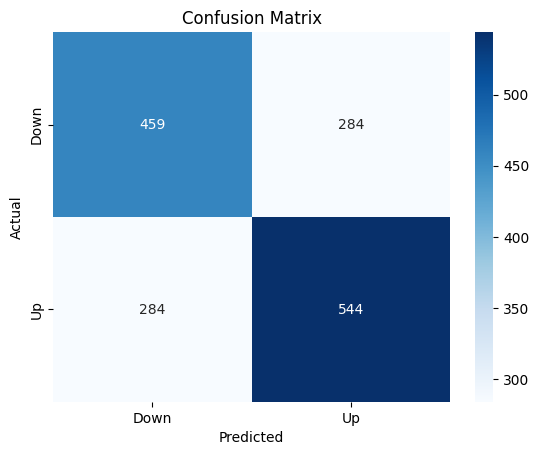

In [8]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [9]:
dot_data = export_graphviz(
    model,
    out_file=None, 
    feature_names=features, 
    class_names=le.classes_,  
    filled=True, 
    rounded=True,  
    special_characters=True  
)
graph = pydot.graph_from_dot_data(dot_data)[0]  
graph.write_png("decision_tree.png")  

from PIL import Image
img = Image.open("decision_tree.png")
display(img)

DecompressionBombError: Image size (266064144 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.

In [ ]:
tuned_model = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)
tuned_model.fit(X_train, y_train)
y_pred_tuned = tuned_model.predict(X_test)

print("\nTuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))


Tuned Model Accuracy: 0.5295989815404201
